In [2]:
# Rosa Lee
# INF2178: Assignment 1

# importing the libraries required for this code
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# importing data frame from Google Drive
from google.colab import drive, files
drive.mount("/drive", force_remount=True)
#importing data into variable df
df = pd.read_excel('/drive/MyDrive/INF2178_A1_data.xlsx')

Mounted at /drive


In [6]:
# quantitative analysis using t-tests

# calculate occupancy rates for beds in the shelter
df['Bed_Occupancy_Rate'] = df['OCCUPIED_BEDS'] / df['CAPACITY_ACTUAL_BED']

# removing the NaN values
df = df.dropna(subset=['Bed_Occupancy_Rate', 'PROGRAM_MODEL', 'SECTOR'])

# t-test for shelter sectors
sectors = df['SECTOR'].unique()
#for loop to perform t-tests on the sector data
for sector in sectors:
    sector_data = df[df['SECTOR'] == sector]
    # extractings the two samples emergency and transitonal for t-test for sector comparison
    emergency_programs = sector_data[sector_data['PROGRAM_MODEL'] == 'Emergency']['Bed_Occupancy_Rate']
    transitional_programs = sector_data[sector_data['PROGRAM_MODEL'] == 'Transitional']['Bed_Occupancy_Rate']
    # if loop to check if either sample has a valid and non-empty data
    if not (emergency_programs.empty or transitional_programs.empty):
        # perform independent t-test
        t_stat, p_value = ttest_ind(emergency_programs, transitional_programs, equal_var=False)
        # printing the results
        print(f"T-test results for sector '{sector}':")
        print(f"T-statistic: {t_stat}")
        print(f"P-value: {p_value}")
        print("")

# t-test for shelter types
shelter_types = df['OVERNIGHT_SERVICE_TYPE'].unique()
for shelter_type in shelter_types:
    type_data = df[df['OVERNIGHT_SERVICE_TYPE'] == shelter_type]['Bed_Occupancy_Rate']
    # if loop to see if data is valid and non-empty
    if not type_data.empty:
        # perform independent t-test against the mean
        t_stat, p_value = ttest_ind(type_data, df['Bed_Occupancy_Rate'], equal_var=False)
        # print the results
        print(f"T-test results for shelter type '{shelter_type}':")
        print(f"T-statistic: {t_stat}")
        print(f"P-value: {p_value}")
        print("")

T-test results for sector 'Mixed Adult':
T-statistic: 20.564639178843063
P-value: 1.243593638236427e-88

T-test results for sector 'Men':
T-statistic: 23.353909287933902
P-value: 3.585351837143295e-112

T-test results for sector 'Women':
T-statistic: 20.72421986470252
P-value: 1.763254618929908e-88

T-test results for sector 'Youth':
T-statistic: 11.57258717730494
P-value: 1.5703981144903252e-30

T-test results for shelter type 'Shelter':
T-statistic: -0.5030195759317381
P-value: 0.6149523456279704

T-test results for shelter type '24-Hour Respite Site':
T-statistic: 42.343914020130256
P-value: 0.0

T-test results for shelter type 'Warming Centre':
T-statistic: -4.4298218221966446
P-value: 1.6040999628779267e-05

T-test results for shelter type '24-Hour Women's Drop-in':
T-statistic: -16.862019629511774
P-value: 3.318499479430612e-51

T-test results for shelter type 'Motel/Hotel Shelter':
T-statistic: -17.402674323545728
P-value: 4.4788916340241316e-40



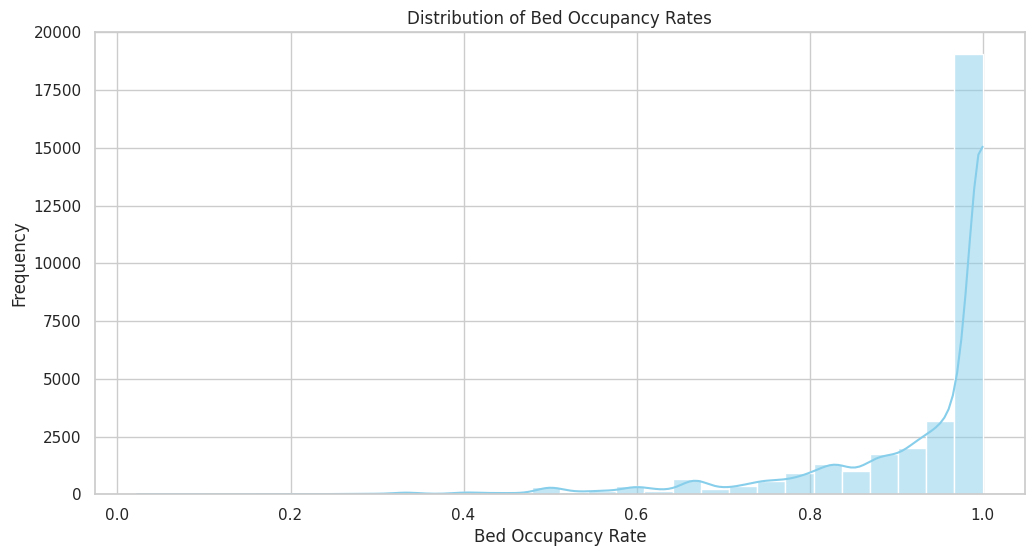

<ipython-input-7-1cb0c31e17a4>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SECTOR', y='Bed_Occupancy_Rate', data=df, palette='Set2')


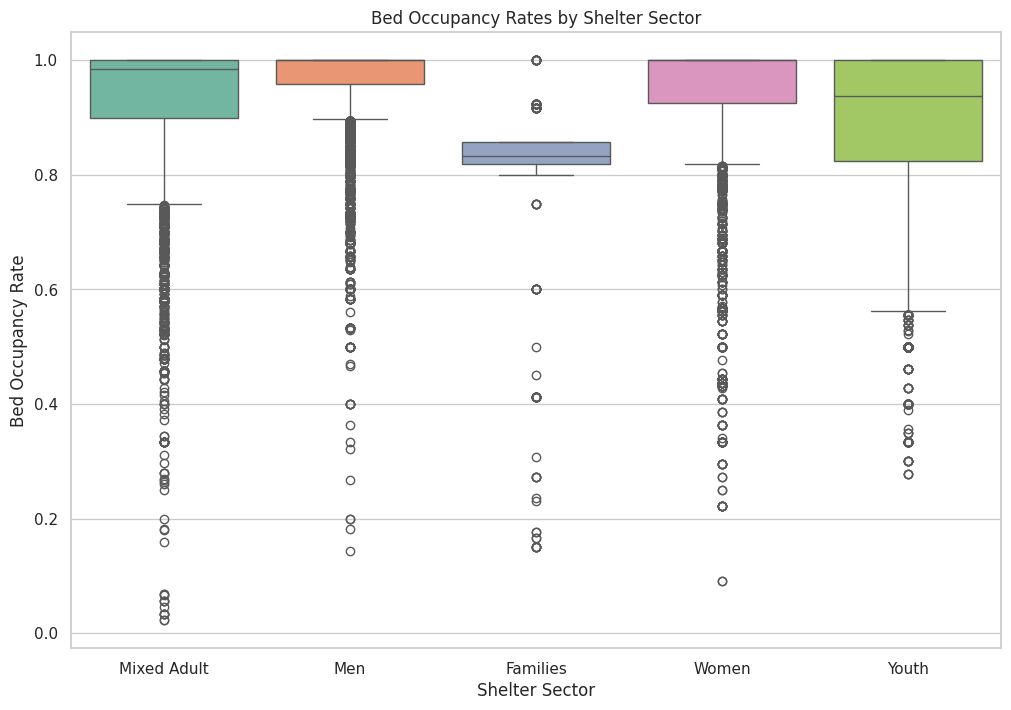

<ipython-input-7-1cb0c31e17a4>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='OVERNIGHT_SERVICE_TYPE', y='Bed_Occupancy_Rate', data=df, palette='viridis')


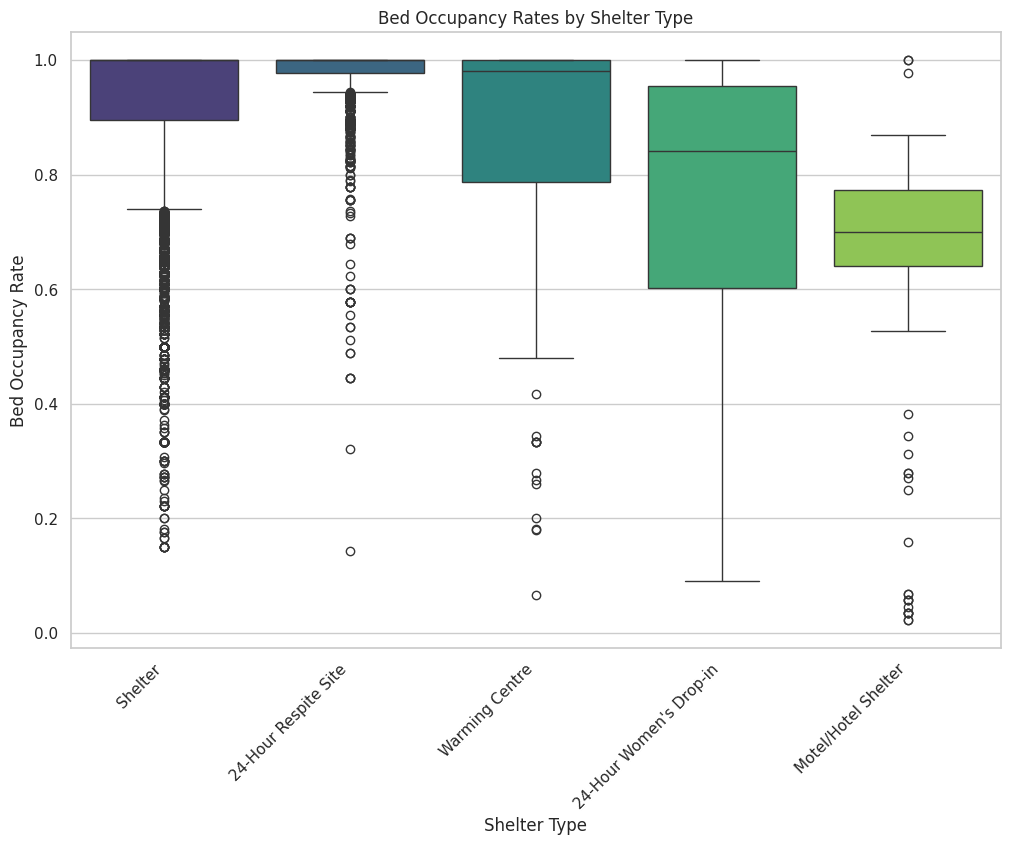

In [7]:
#EDA

# set the style for seaborn plots
sns.set(style="whitegrid")

# EDA: Distribution of Bed Occupancy Rates
plt.figure(figsize=(12, 6))
sns.histplot(df['Bed_Occupancy_Rate'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Bed Occupancy Rates')
plt.xlabel('Bed Occupancy Rate')
plt.ylabel('Frequency')
plt.show()

# EDA: Boxplot of Bed Occupancy Rates by Shelter Sector
plt.figure(figsize=(12, 8))
sns.boxplot(x='SECTOR', y='Bed_Occupancy_Rate', data=df, palette='Set2')
plt.title('Bed Occupancy Rates by Shelter Sector')
plt.xlabel('Shelter Sector')
plt.ylabel('Bed Occupancy Rate')
plt.show()

# EDA: Boxplot of Bed Occupancy Rates by Shelter Type
plt.figure(figsize=(12, 8))
sns.boxplot(x='OVERNIGHT_SERVICE_TYPE', y='Bed_Occupancy_Rate', data=df, palette='viridis')
plt.title('Bed Occupancy Rates by Shelter Type')
plt.xlabel('Shelter Type')
plt.ylabel('Bed Occupancy Rate')
plt.xticks(rotation=45, ha='right')
plt.show()
